In [343]:
import nltk
import pandas as pd

In [344]:
#nltk.download()

1. Preberite datoteko wineReviews.csv in izpišite prvih 5 ocen vin.

In [345]:
df = pd.read_csv("wineReviews.csv", encoding="ISO-8859-1", sep="	", index_col="wineId")
df.head(5)

,country,description
wineId,,
219,Hungary,From a vineyard in Northern Tokaj this dry Fur...
271,Greece,"Lively aromas of lemon, grapefruit and melon s..."
308,Greece,This fuller-bodied white blend offers pineappl...
351,Hungary,This amber-colored Hungarian stunner has ether...
377,Greece,"A fresh, tangy, vibrant wine that has ripe gre..."


2. Izpišite iz katerih držav prihajajo ocenjena vina in koliko jih prihaja iz posamezne države.

In [346]:
df["country"].value_counts()

Greece      466
Hungary     146
Slovenia     87
Croatia      73
Name: country, dtype: int64

3. Združite ocene vseh slovenskih vin v skupno besedilo. To besedilo:

- tokeniziraje in izpišite 10 tokenov, ki imajo najvišjo frekvenco pojavitve,
- izrišite graf, ki bo ponazoril, katerih 20 tokenov se največkrat pojavi v oceni slovenskih vin,
- iz besedila odstranite vse "stop words" (besede brez pomena in ločila) ter izmed preostalih tokenov izpišite 5 takšnih, ki imajo najvišjo frekvenco pojavitve,
- iz tako prečiščenega besedila izpišite 4 najpogostejše bigrame in trigrame.

In [347]:
slovenia_rows = df.loc[df["country"] == "Slovenia"]

review = ""

for description in slovenia_rows["description"]:
    review += description

In [348]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

tokens = word_tokenize(review)
tokens = [word.lower() for word in tokens]

token_freq = FreqDist(tokens)

for word, freq in token_freq.most_common(10):
    print(f'{word:<15}: {freq}')

,              : 232
and            : 224
of             : 184
the            : 124
.              : 107
with           : 101
a              : 93
is             : 62
flavors        : 62
it             : 58


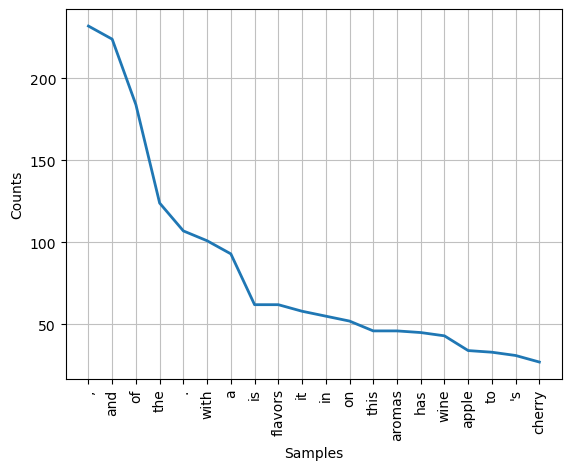

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [349]:
import matplotlib

token_freq.plot(20, cumulative=False)

In [350]:
from nltk.corpus import stopwords
import string

stop_list = stopwords.words('english') + list(string.punctuation)
tokens = [token for token in tokens if token not in stop_list]

token_freq = FreqDist(tokens)

for word, freq in token_freq.most_common(5):
    print(f'{word:<15}: {freq}')

flavors        : 62
aromas         : 46
wine           : 43
apple          : 34
's             : 31


In [351]:
from nltk import ngrams

bigram = FreqDist(ngrams(tokens, 2))
for word, freq in bigram.most_common(4):
    print(f'{str(word):<15}: {freq}')

('ribolla', 'gialla'): 11
('green', 'apple'): 10
('white', 'peach'): 8
('black', 'cherry'): 8


In [352]:
from nltk import ngrams

trigram = FreqDist(ngrams(tokens, 3))
for word, freq in trigram.most_common(4):
    print(f'{str(word):<15}: {freq}')

('ribolla', 'gialla', 'aromas'): 4
('freshly', 'cut', 'grass'): 4
('cherry', 'red', 'raspberry'): 3
('tangerine', 'acidity', "'s"): 3


4. V datafram-u ustvarite nov stolpec poimenovan processed, kamor shranite besedilo ocen (description), ki je:

- v celoti zapisano z malimi črkami,
- brez "stop words" (besede brez pomena in ločila),
- besede morajo biti krnjene (nad njimi uporabite stemming).

In [353]:
from nltk.stem import PorterStemmer


def process_text(text: str):
    stemmer = PorterStemmer()
    tokenized_text = word_tokenize(text)
    tokenized_text = [token.lower() for token in tokenized_text if token not in stop_list]
    tokenized_text = [stemmer.stem(token) for token in tokenized_text]
    return ' '.join(tokenized_text)


df['processed'] = df['description'].apply(process_text)
df.head()

,country,description,processed
wineId,,,
219,Hungary,From a vineyard in Northern Tokaj this dry Fur...,from vineyard northern tokaj dri furmint aroma...
271,Greece,"Lively aromas of lemon, grapefruit and melon s...",live aroma lemon grapefruit melon start white ...
308,Greece,This fuller-bodied white blend offers pineappl...,thi fuller-bodi white blend offer pineappl kiw...
351,Hungary,This amber-colored Hungarian stunner has ether...,thi amber-color hungarian stunner ether aroma ...
377,Greece,"A fresh, tangy, vibrant wine that has ripe gre...",a fresh tangi vibrant wine ripe green plum app...


5. S pomočjo TfidfVectorizer razdelite predprocesirana besedila ocen (iz stolpca processed) na unigrame in izpišite koliko je vseh nastalih tokenov (features).


In [354]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                             lowercase=True)

input_data = vectorizer.fit_transform(df['processed'])

print(vectorizer.get_feature_names())
print(f'Vseh feature-ov je {len(vectorizer.get_feature_names())}')

['000', '10', '100', '11', '13', '15', '150', '16', '17', '18', '20', '2010', '2016', '21', '22', '24', '25', '27', '30', '33', '34', '35', '40', '50', '5â', '60', '65', '70', '72', '80', '86', 'abil', 'abound', 'abund', 'abundantli', 'abv', 'acacia', 'acc', 'accent', 'access', 'accompani', 'acid', 'acidityâ', 'acquir', 'ad', 'add', 'addit', 'administ', 'advantag', 'aegean', 'aerat', 'afford', 'after', 'ag', 'age', 'ageabl', 'ageworthi', 'aggress', 'agiorgitiko', 'agiorgitkio', 'agiorgitko', 'aimless', 'air', 'akin', 'alcohol', 'alfalfa', 'alik', 'aliv', 'all', 'allspic', 'allur', 'almond', 'almost', 'aloft', 'alon', 'along', 'alongsid', 'alpha', 'alreadi', 'also', 'altern', 'altitud', 'amber', 'ambiti', 'american', 'ameriku', 'amidst', 'among', 'amount', 'ampl', 'amyndeon', 'an', 'ancestor', 'ancient', 'and', 'angular', 'anis', 'anise', 'anjou', 'anoth', 'anyth', 'anytim', 'apart', 'appeal', 'appet', 'appl', 'appreci', 'approach', 'apricot', 'apt', 'apã', 'aroma', 'aromasâ', 'aromat',

/opt/homebrew/Caskroom/miniforge/base/envs/6_vaja/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


6. Nad tako pripravljenimi podatki uporabite klasifikacijski algoritem Support Vector Classification, s katerim napoveste v katero državo sodi vino glede na besedilo podane ocene. Učna množica naj zajema 75% vseh podatkov, naključno stanje pa naj bo 123. Izpišite točnost klasifikacije.

In [355]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(input_data, df['country'], test_size=0.25, random_state=123)
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7927461139896373

7. Enak postopek klasifikacije ponovite še nad bigrami in trigrami. Primerjajte točnosti klasifikacije.

In [356]:
vectorizer1 = TfidfVectorizer(ngram_range=(1,2),
                              preprocessor=process_text)

input_data1 = vectorizer1.fit_transform(df['processed'])

X_train, X_test, y_train, y_test = train_test_split(input_data1, df['country'], test_size=0.25, random_state=123)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7150259067357513

In [357]:
vectorizer2 = TfidfVectorizer(ngram_range=(1,3),
                              preprocessor=process_text)

input_data2 = vectorizer2.fit_transform(df['processed'])

X_train, X_test, y_train, y_test = train_test_split(input_data2, df['country'], test_size=0.25, random_state=123)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.6787564766839378

8. Za konec vzemite še neprečiščeno besedilo ocen iz stolpca description. Predprocesirajte ga z uporabo TfidfVectorizer in ga razdelite na unigrame. Nad njim izvedite klasifikacijo z enakim algoritmom, enako delitvijo učnih/testih podatkov, in enakim izhodnim razredom kot v prejšnjih točkah. Točnost klasifikacije primerjajte s tisto iz 6. točke.

In [358]:
vectorizer3 = TfidfVectorizer(ngram_range=(1,1),
                              preprocessor=process_text)

input_data3 = vectorizer3.fit_transform(df['description'])

X_train, X_test, y_train, y_test = train_test_split(input_data3, df['country'], test_size=0.25, random_state=123)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7927461139896373